In [3]:
import cv2
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

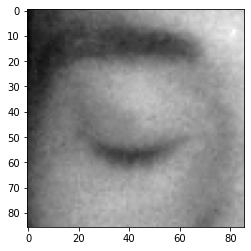

In [2]:
img_array = cv2.imread('C:/Users/Praveen/Desktop/3rd Sem/CSP 571 - DPA/Project/train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap="gray")

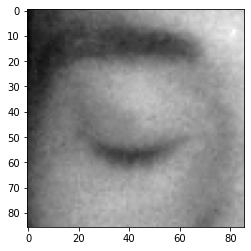

In [10]:
Datadirectory = 'C:/Users/Praveen/Desktop/3rd Sem/CSP 571 - DPA/Project/train'
Classes = ['Closed_Eyes', 'Open_Eyes']

for category in Classes:
  path = os.path.join(Datadirectory, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

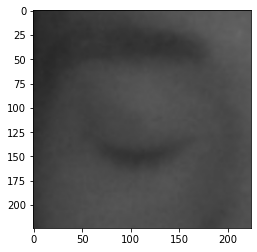

In [11]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [12]:
training_data = []

def create_training_data():
  for category in Classes:
      path = os.path.join(Datadirectory, category)
      class_num = Classes.index(category)
      for img in os.listdir(path):
        try :
           img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
           backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
           new_array = cv2.resize(backtorgb, (img_size,img_size))
           training_data.append([new_array, class_num])
        except Exception as e:
          pass

In [13]:
create_training_data()

In [14]:
print(len(training_data))

4000


In [15]:
import random
random.shuffle(training_data)

In [16]:
#here we reshape the image.
X = []
y = []
for features, label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [17]:
X.shape

(4000, 224, 224, 3)

In [18]:
X = X/255.0
Y = np.array(y)

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
model = tf.keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 4s 0us/step


In [21]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [22]:
base_input = model.layers[0].input
base_output = model.layers[-4].output

In [23]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

new_model = keras.Model(inputs = base_input, outputs = final_output)

new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [24]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

new_model.fit(X,Y, epochs = 2, validation_split = 0.1)
#Note: Increase the number of epoch to get more appropriate result, accuracy.

Epoch 1/2
113/113 [==============================] - 204s 2s/step - loss: 0.0325 - accuracy: 0.9900 - val_loss: 0.0875 - val_accuracy: 0.9850
Epoch 2/2
113/113 [==============================] - 198s 2s/step - loss: 0.0055 - accuracy: 0.9983 - val_loss: 2.8828e-07 - val_accuracy: 1.0000


In [25]:
new_model.save('my_model.h5')
new_model = tf.keras.models.load_model('my_model.h5')

In [27]:
img_array = cv2.imread('C:/Users/Praveen/Desktop/3rd Sem/CSP 571 - DPA/Project/train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (img_size, img_size))
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

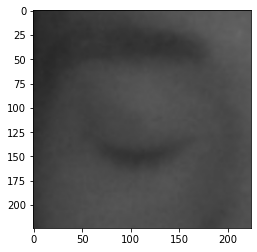

In [29]:
plt.imshow(new_array)

In [30]:
X_input = X_input/255.0
prediction = new_model.predict(X_input)
prediction

array([[8.902586e-12]], dtype=float32)

In [32]:
img_array = cv2.imread('C:/Users/Praveen/Desktop/3rd Sem/CSP 571 - DPA/Project/train/Open_Eyes/s0001_02334_0_0_1_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (img_size, img_size))
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

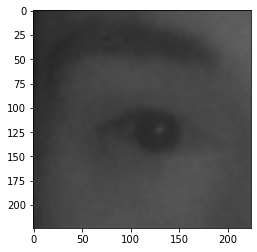

In [33]:
plt.imshow(new_array)

In [34]:
X_input = X_input/255.0
prediction = new_model.predict(X_input)
prediction

array([[1.]], dtype=float32)